# Springboard Regression Case Study - The Red Wine Dataset - Tier 3

Welcome to the Springboard Regression case study! Please note: this is ***Tier 3*** of the case study.

This case study was designed for you to **use Python to apply the knowledge you've acquired in reading *The Art of Statistics* (hereinafter *AoS*) by Professor Spiegelhalter**. Specifically, the case study will get you doing regression analysis; a method discussed in Chapter 5 on p.121. It might be useful to have the book open at that page when doing the case study to remind you of what it is we're up to (but bear in mind that other statistical concepts, such as training and testing, will be applied, so you might have to glance at other chapters too).  

The aim is to ***use exploratory data analysis (EDA) and regression to predict acidity levels in wine with a model that's as accurate as possible***. 

We'll try a *univariate* analysis (one involving a single explanatory variable) as well as a *multivariate* one (involving multiple explanatory variables), and we'll iterate together towards a decent model by the end of the notebook. The main thing is for you to see how regression analysis looks in Python and Jupyter, and to get some practice implementing this analysis.

Throughout this case study, **questions** will be asked in the markdown cells. Try to **answer these yourself in a simple text file** when they come up. Most of the time, the answers will become clear as you progress through the notebook. Some of the answers may require a little research with Google and other basic resources available to every data scientist. 

For this notebook, we're going to use the red wine dataset, wineQualityReds.csv. Make sure it's downloaded and sitting in your working directory. This is a very common dataset for practicing regression analysis and is actually freely available on Kaggle, [here](https://www.kaggle.com/piyushgoyal443/red-wine-dataset).

You're pretty familiar with the data science pipeline at this point. This project will have the following structure: 
**1. Sourcing and loading** 
- Import relevant libraries
- Load the data 
- Exploring the data
- Choosing a dependent variable
 
**2. Cleaning, transforming, and visualizing**
- Visualizing correlations
  
  
**3. Modeling** 
- Train/Test split
- Making a *univariate* Linear regression model: your first model
- Making a *multivariate* Linear regression model: Ordinary Least Squares (OLS) 
- Model optimization: Backward Elimination

**4. Evaluating and concluding** 
- Reflection 
- Which model was best?
- Other regression algorithms

### 1. Sourcing and loading

#### 1a. Import relevant libraries 

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
%matplotlib inline
sns.set(style = "whitegrid", font_scale = 1.5)

import statsmodels.api as sm # library of models and the most frequently used statistical test, and tools
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # metrics for the accuracy of model predictions
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # preprocessing is used for scaling and standardization of data
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from scipy.stats import norm # will use it at the end to create a normal distribution for comparison with residuals histogram

#### 1b. Load the data

In [2]:
# Load the data. 
wine = pd.read_csv("wineQualityReds.csv")

#### 1c. Exploring the data

In [3]:
# Check out its appearance. 
wine.head(10)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,8,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,10,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# Another very useful method to call on a recently imported dataset is .info(). Call it here to get a good
# overview of the data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


What can you infer about the nature of these variables, as output by the info() method?

Which variables might be suitable for regression analysis, and why? For those variables that aren't suitable for regression analysis, is there another type of statistical modeling for which they are suitable?

### Answer:
- There are 13 features (columns) and 1599 entries (rows) for each feature
- All features are numerical
    - The first feature is integer, but appears to carry no useful information, so it can be discarded
    - Last feature, 'quality', is also integer. Naturally this could have been a good candidate for a target feature. However, integers are not a good choice for linear regression modeling.
    - The rest of the features are floating numbers and any of them could be a target in a linear regression model

#### 1d. Choosing a dependent variable

We now need to pick a dependent variable for our regression analysis: a variable whose values we will predict. 

'Quality' seems to be the natural choice. Let's check it out. One of the quickest and most informative ways to understand a variable is to make a histogram of it. This gives us an idea of both the center and spread of its values. 

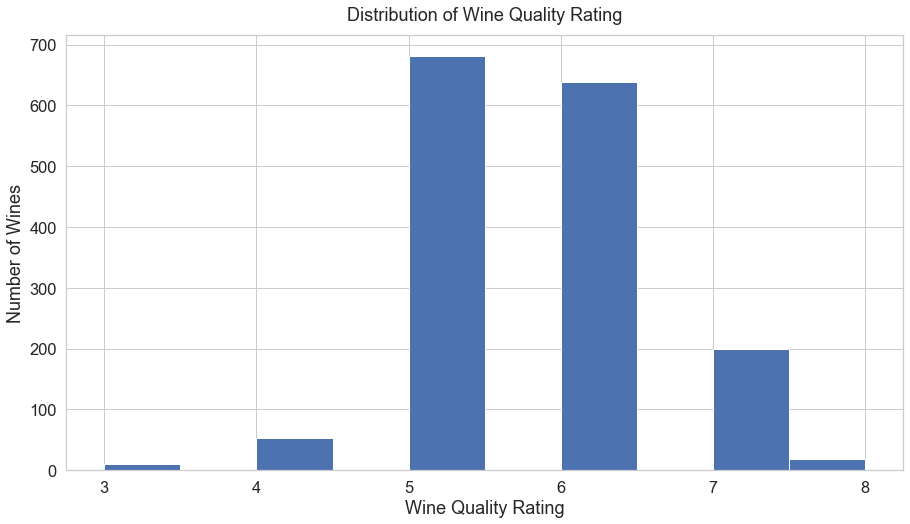

In [5]:
# Making a histogram of the quality variable.

plt.figure(figsize = (15, 8))
plt.hist(wine.quality, bins = 10)
plt.xlabel('Wine Quality Rating')
plt.ylabel('Number of Wines')
plt.title('Distribution of Wine Quality Rating', pad = 15)
plt.show()

We can see so much about the quality variable just from this simple visualization. Answer yourself: what value do most wines have for quality? What is the minimum quality value below, and the maximum quality value? What is the range? Remind yourself of these summary statistical concepts by looking at p.49 of the *AoS*.

But can you think of a problem with making this variable the dependent variable of regression analysis? Remember the example in *AoS* on p.122 of predicting the heights of children from the heights of parents? Take a moment here to think about potential problems before reading on. 

The issue is this: quality is a *discrete* variable, in that its values are integers (whole numbers) rather than floating point numbers. Thus, quality is not a *continuous* variable. But this means that it's actually not the best target for regression analysis. 

Before we dismiss the quality variable, however, let's verify that it is indeed a discrete variable with some further exploration. 

In [6]:
# Get a basic statistical summary of the variable

wine['quality'].describe()

# What do you notice from this summary?

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

- The quality values range from 3 to 8 with most values being 5 and 6

In [7]:
# Get a list of the values of the quality variable, and the number of occurrences of each. 
wine['quality'].value_counts(dropna = False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The outputs of the describe() and value_counts() methods are consistent with our histogram, and since there are just as many values as there are rows in the dataset, we can infer that there are no NAs for the quality variable. 

But scroll up again to when we called info() on our wine dataset. We could have seen there, already, that the quality variable had int64 as its type. As a result, we had sufficient information, already, to know that the quality variable was not appropriate for regression analysis. Did you figure this out yourself? If so, kudos to you!

The quality variable would, however, conduce to proper classification analysis. This is because, while the values for the quality variable are numeric, those numeric discrete values represent *categories*; and the prediction of category-placement is most often best done by classification algorithms. You saw the decision tree output by running a classification algorithm on the Titanic dataset on p.168 of Chapter 6 of *AoS*. For now, we'll continue with our regression analysis, and continue our search for a suitable dependent variable. 

Now, since the rest of the variables of our wine dataset are continuous, we could — in theory — pick any of them. But that does not mean that are all equally suitable choices. What counts as a suitable dependent variable for regression analysis is determined not just by *intrinsic* features of the dataset (such as data types, number of NAs etc) but by *extrinsic* features, such as, simply, which variables are the most interesting or useful to predict, given our aims and values in the context we're in. Almost always, we can only determine which variables are sensible choices for dependent variables with some **domain knowledge**. 

Not all of you might be wine buffs, but one very important and interesting quality in wine is [acidity](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity). As the Waterhouse Lab at the University of California explains, 'acids impart the sourness or tartness that is a fundamental feature in wine taste.  Wines lacking in acid are "flat." Chemically the acids influence titrable acidity which affects taste and pH which affects  color, stability to oxidation, and consequently the overall lifespan of a wine.'

If we cannot predict quality, then it seems like **fixed acidity** might be a great option for a dependent variable. Let's go for that.

So if we're going for fixed acidity as our dependent variable, what we now want to get is an idea of *which variables are related interestingly to that dependent variable*. 

We can call the .corr() method on our wine data to look at all the correlations between our variables. As the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) shows, the default correlation coefficient is the Pearson correlation coefficient (p.58 and p.396 of the *AoS*); but other coefficients can be plugged in as parameters. Remember, the Pearson correlation coefficient shows us how close to a straight line the data-points fall, and is a number between -1 and 1. 

- Before continuing further, eliminate 'Unnamed' and 'quality' from the data

In [8]:
wine.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [9]:
# select all columns except 'Unnamed' and 'quality'

wine = wine[['fixed.acidity', 'volatile.acidity', 'citric.acid','residual.sugar', 'chlorides', 
             'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

# confirm by calling .info()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [10]:
# Call the .corr() method on the wine dataset 
wine.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


Ok - you might be thinking, but wouldn't it be nice if we visualized these relationships? It's hard to get a picture of the correlations between the variables without anything visual. 

Very true, and this brings us to the next section.

### 2. Cleaning, Transforming, and Visualizing 

#### 2a. Visualizing correlations 
The heading of this stage of the data science pipeline ('Cleaning, Transforming, and Visualizing') doesn't imply that we have to do all of those operations in *that order*. Sometimes (and this is a case in point) our data is already relatively clean, and the priority is to do some visualization. Normally, however, our data is less sterile, and we have to do some cleaning and transforming first prior to visualizing. 

Now that we've chosen **fixed acidity** as our dependent variable for regression analysis, we can begin by plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

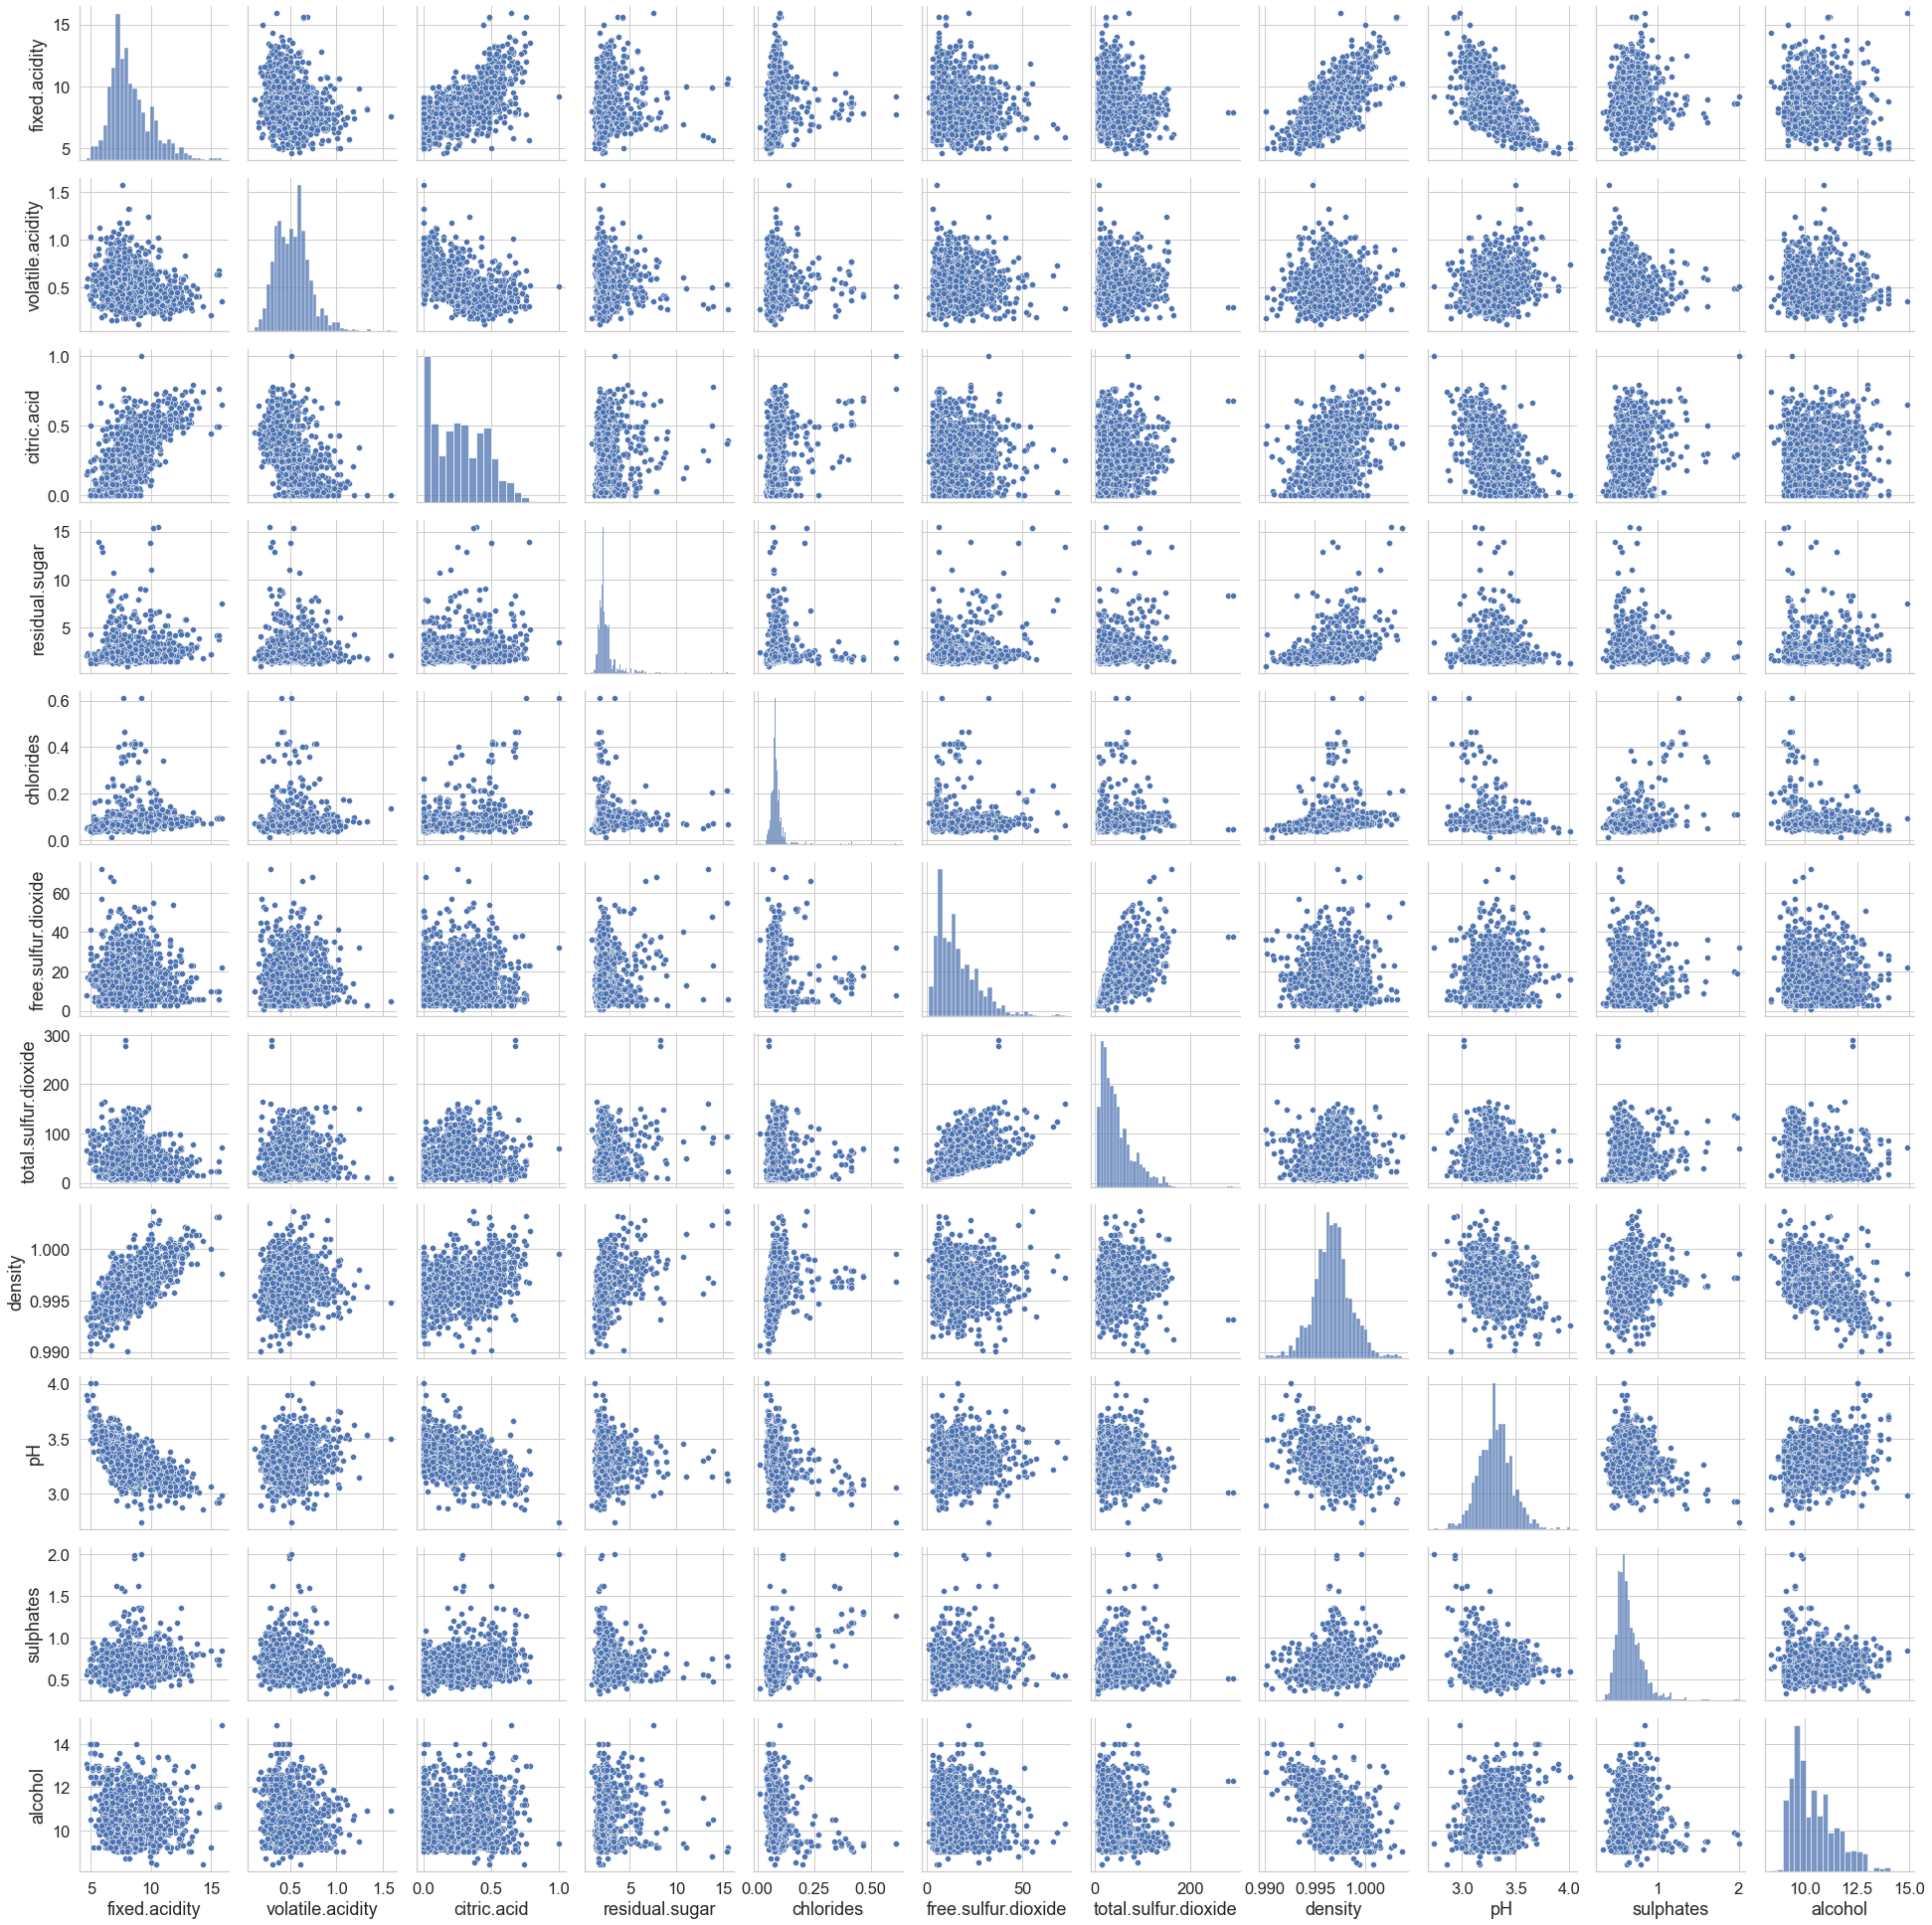

In [11]:
# Make a pairplot of the wine data
sns.pairplot(wine)
plt.tight_layout
plt.show()

If you've never executed your own Seaborn pairplot before, just take a moment to look at the output. They certainly output a lot of information at once. What can you infer from it? What can you *not* justifiably infer from it?

... All done? 

Here's a couple things you might have noticed: 
- a given cell value represents the correlation that exists between two variables 
- on the diagonal, you can see a bunch of histograms. This is because pairplotting the variables with themselves would be pointless, so the pairplot() method instead makes histograms to show the distributions of those variables' values. This allows us to quickly see the shape of each variable's values.  
- Notice that some of the nice plots invite a line of best fit, such as ***fixed.acidity*** vs ***density***. Others, such as ***fixed.acidity*** vs ***alcohol***, are more inscrutable.

So we now have called the .corr() method, and the .pairplot() Seaborn method, on our wine data. Both have flaws. Perhaps, the best way to visualize correlations between features is using a heatmap. 

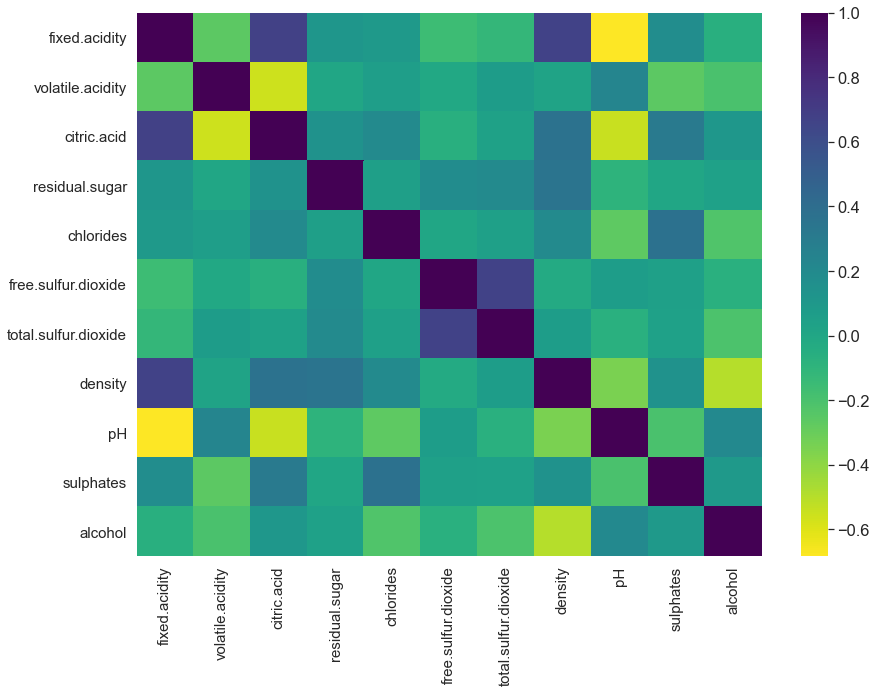

In [12]:
# Create a heatmap of the correlation matrix

plt.figure(figsize = (14, 10))
sns.heatmap(wine.corr(), cmap = 'viridis_r')
plt.tick_params(labelsize = 15)
plt.show()

Take a moment to think about the following questions:
- How does color relate to extent of correlation?
- How might we use the plot to show us interesting relationships worth investigating? 
- More precisely, what does the heatmap show us about the fixed acidity variable's relationship to the density variable? 

There is a relatively strong correlation between the density and fixed acidity variables respectively. In the next code block, call the scatterplot() method on our sns object. Make the x-axis parameter 'density', the y-axis parameter 'fixed.acidity', and the third parameter specify our wine dataset.  

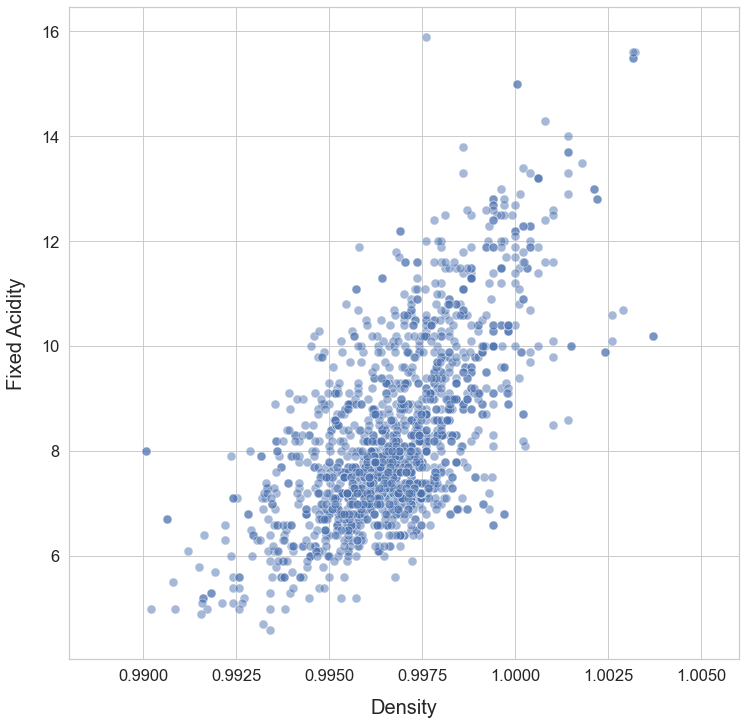

In [13]:
# Plot fixed.acidity vs. density

plt.figure(figsize = (12, 12))
sns.scatterplot(x = 'density', y = 'fixed.acidity', data = wine, s = 80, alpha = 0.5)
plt.xlim(0.988, 1.006)
plt.xlabel('Density', fontsize = 20, labelpad = 15)
plt.ylabel('Fixed Acidity', fontsize = 20, labelpad = 15)
plt.show()

We can see a positive correlation here. There are some outliers, but as a whole, it looks like there is a line that can be drawn through all the points on the plot. 

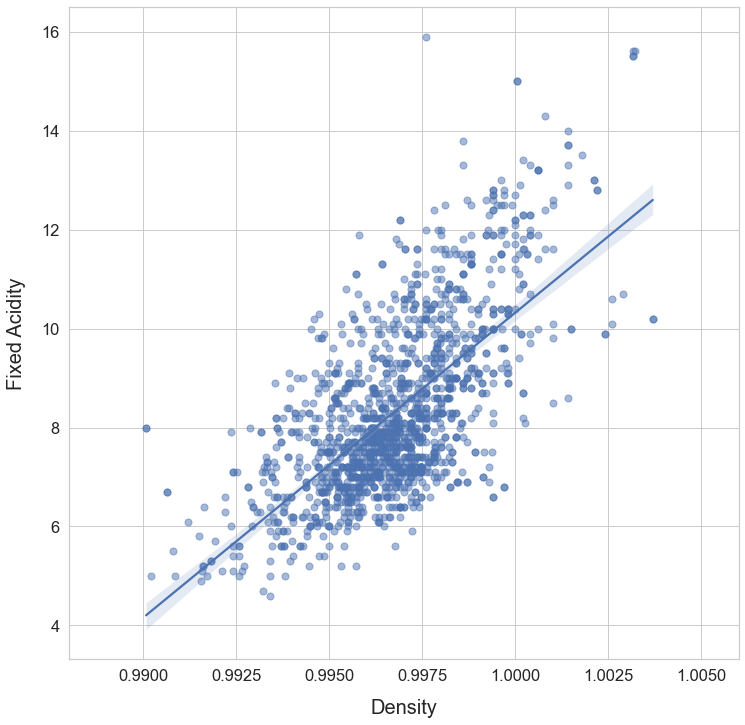

In [14]:
# Call the regplot method on your sns object, with parameters: x = 'density', y = 'fixed.acidity'
plt.figure(figsize = (12, 12))
sns.regplot(x = 'density', y = 'fixed.acidity', data = wine, marker='o', scatter_kws={'s':50, 'alpha':0.5})
plt.xlim(0.988, 1.006)
plt.xlabel('Density', fontsize = 20, labelpad = 15)
plt.ylabel('Fixed Acidity', fontsize = 20, labelpad = 15)
plt.show()

The line of best fit matches the overall shape of the data, but it's clear that there are some points that deviate from the line, rather than all clustering close. 

Let's see if we can predict fixed acidity based on density using linear regression. 

### 3. Modeling 

#### 3a. Train/Test Split
While this dataset is super clean, and hence doesn't require much for analysis, we still need to split our dataset into a test set and a training set.

You'll recall from p.158 of *AoS* that such a split is important good practice when evaluating statistical models. On p.158, Professor Spiegelhalter was evaluating a classification tree, but the same applies when we're doing regression. Normally, we train with 75% of the data and test on the remaining 25%. 

To be sure, for our first model, we're only going to focus on two variables: fixed acidity as our dependent variable, and density as our sole independent predictor variable. 

We'll be using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) here. Don't worry if not all of the syntax makes sense; just follow the rationale for what we're doing. 

In [15]:
# Subsetting our data into our dependent and independent variables.

X = wine[['density']].values 
y = wine[['fixed.acidity']].values

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [16]:
# Check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1199, 1) (1199, 1)
(400, 1) (400, 1)


#### 3b. Making a *univariate* Linear Regression model: our first model
Sklearn has a [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function built into the linear_model module. We'll be using that to make our regression model. 

In [17]:
# Create the model: make a variable called model, and use it linear_model.LinearRegression appropriately
model = linear_model.LinearRegression(normalize = True)

In [18]:
# We now want to train the model on our test data.
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [19]:
# Evaluate the model  
print(round(model.score(X_train, y_train), 4))

0.4295


The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 43% of the variation from the mean. There's more work to do!

In [20]:
# make predictions using test data
y_pred = model.predict(X_test)

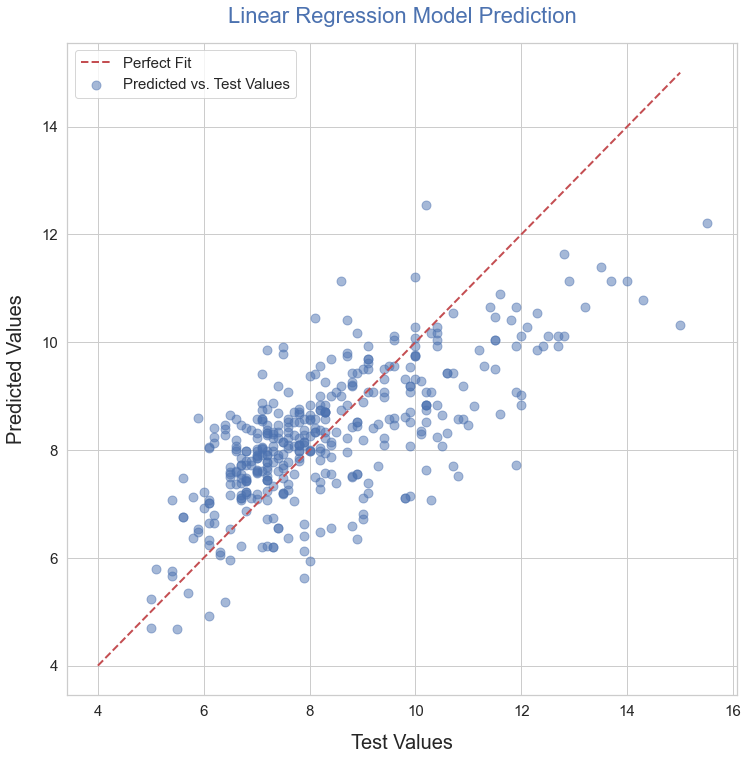

In [21]:
# Plot the predictions against the actual test values

# define the perfect fit line
y_line = np.arange(int(y_test.min() - 1), int(y_test.max() + 1))

plt.figure(figsize = (12, 12))
plt.scatter(y_test, y_pred, s = 80, c = 'b', alpha = 0.5, label = 'Predicted vs. Test Values')
plt.plot(y_line, y_line, 'r--', lw = 2, label = 'Perfect Fit')
plt.xlabel('Test Values', fontsize = 20, labelpad = 15)
plt.ylabel('Predicted Values', fontsize = 20, labelpad = 15)
plt.title('Linear Regression Model Prediction', fontsize = 22, c = 'b', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

The above scatterplot represents how well the predictions match the actual results. 

Along the x-axis, we have the actual fixed acidity, and along the y-axis we have the predicted value for the fixed acidity.

There is a visible positive correlation, as the model has not been totally unsuccessful, but it's clear that it is not maximally accurate: wines with an actual fixed acidity of just over 10 have been predicted as having acidity levels from about 6.3 to 13.

Let's build a similar model using a different package, to see if we get a better result that way.

#### 3c. Multi-linear Regression model: Optimization using Ordinary Least Squares (OLS)

- Start with all features/variables
- Use backward elimination to eliminate insignificant variables --> define threshold p-value < 0.05
- Gauge model performance from the adjusted R2 value - we have multiple variables

In [22]:
# Add a column of ones to X to simulate the constant term in the regression --> required when using statsmodels

# re-define X to include all independent features from data

# add constant term to X
X = wine.iloc[:, 1:].values # all features, but the target (fist column in wine df)
X = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis = 1)
X

array([[ 1.   ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 1.   ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 1.   ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 1.   ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 1.   ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 1.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

- First column now is ones and the rest of the columns are values of the independent wine features

In [23]:
X.shape

(1599, 11)

In [24]:
# Define an array, X_opt, for the Backward Elimination --> start with all features

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

# use X_opt and create train/test data subsets
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.25, random_state = 42)

In [25]:
# create model, fit and provide summary

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit() # Ordinary Least Squares (OLS) model
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     743.2
Date:                Wed, 30 Dec 2020   Prob (F-statistic):               0.00
Time:                        09:39:27   Log-Likelihood:                -1159.0
No. Observations:                1199   AIC:                             2340.
Df Residuals:                    1188   BIC:                             2396.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -629.1062     15.333    -41.031      0.000    -659.188    -599.024
x1             0.3153      0.137      2.297      0.022       0.046       0.585
x2             1.9644      0.158     12.426      0.000       1.654       2.275
x3            -0.2656      0.015    -17.380      0.000      -0.296      -0.236
x4            -3.5584      0.448     -7.946      0.000      -4.437      -2.680
x5             0.0102      0.003      4.081      0.000       0.005       0.015
x6            -0.0067      0.001     -8.261      0.000      -0.008      -0.005
x7           652.2003     15.289     42.658      0.000     622.204     682.197
x8            -5.2860      0.151    -34.897      0.000      -5.583      -4.989
x9            -0.7486      0.125     -5.998      0.000      -0.993      -0.504
x10            0.5536      0.025     21.980      0.000       0.504       0.603
==============================================================================
Omnibus:                      105.043   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.071
Skew:                           0.382   Prob(JB):                     1.45e-79
Kurtosis:                       5.585   Cond. No.                     7.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Great improvement in R2 value --> increased from 0.43 from initial model to 0.86
- All p-values are smaller than 0.05
    - Despite that let's eliminate the first feature (index 1 in X_opt) which has the largest p-value of 0.022 - this corresponds to volatile.acidity in wine data

In [26]:
X_opt = X[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]] # remove colum with index = 1 and repeat

X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.25, random_state = 42)

regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     822.2
Date:                Wed, 30 Dec 2020   Prob (F-statistic):               0.00
Time:                        09:39:27   Log-Likelihood:                -1161.7
No. Observations:                1199   AIC:                             2343.
Df Residuals:                    1189   BIC:                             2394.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -638.2560     14.833    -43.031      0.000    -667.357    -609.155
x1             1.7619      0.131     13.405      0.000       1.504       2.020
x2            -0.2671      0.015    -17.465      0.000      -0.297      -0.237
x3            -3.2627      0.430     -7.593      0.000      -4.106      -2.420
x4             0.0093      0.002      3.747      0.000       0.004       0.014
x5            -0.0063      0.001     -7.937      0.000      -0.008      -0.005
x6           661.5813     14.760     44.823      0.000     632.623     690.540
x7            -5.2969      0.152    -34.923      0.000      -5.595      -4.999
x8            -0.8145      0.122     -6.694      0.000      -1.053      -0.576
x9             0.5608      0.025     22.406      0.000       0.512       0.610
==============================================================================
Omnibus:                       99.830   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.365
Skew:                           0.367   Prob(JB):                     2.47e-73
Kurtosis:                       5.481   Cond. No.                     6.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R2 score remains the same - do not have further improvement
- All p-values are now 0 --> all remaining features are important in determining the target values

#### 3d. Multi-linear regression: Making predictions using all independent wine features except volatile.acidity

In [27]:
# create new X array which contains all wine features except 'volatile.acidity'
X = wine.iloc[:, 2:].values

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [28]:
# train the model by fitting X_train, y_train
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
# Evaluate the model  
print(round(model.score(X_train, y_train), 4))

0.8616


- As expected the R2 score increased from 0.43 to 0.86 --> the closer R2 to 1, the more accurate the predictions

In [30]:
# make predictions
y_pred = model.predict(X_test)

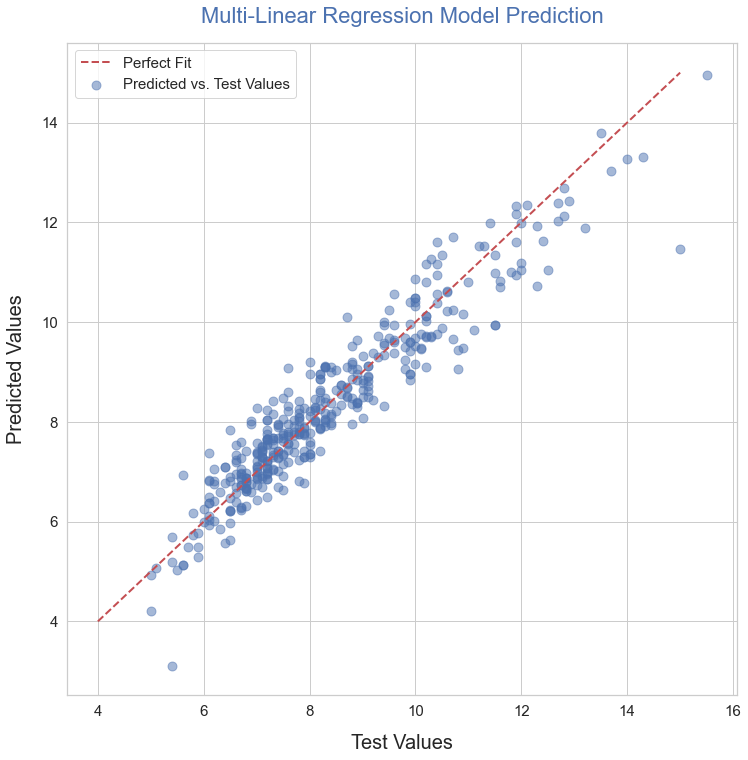

In [31]:
# Plot the predictions against the actual test values

# define the perfect fit line
y_line = np.arange(int(y_test.min() - 1), int(y_test.max() +1))

plt.figure(figsize = (12, 12))
plt.scatter(y_test, y_pred, s = 80, c = 'b', alpha = 0.5, label = 'Predicted vs. Test Values')
plt.plot(y_line, y_line, 'r--', lw = 2, label = 'Perfect Fit')
plt.xlabel('Test Values', fontsize = 20, labelpad = 15)
plt.ylabel('Predicted Values', fontsize = 20, labelpad = 15)
plt.title('Multi-Linear Regression Model Prediction', fontsize = 22, c = 'b', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

- The match between test data and predictions is much better --> scatterplot points are closely aligned with the perfect fit line

For more quantitative evaluation of the accuracy of the predictions we will obtain and plot the histogram of the residuals.

In [32]:
# get residuals

res = y_test - y_pred

# print residuals mean and std
print("Residuals mean:", round(res.mean(), 4))
print("Residuals std:", round(res.std(), 4))
print("Residuals normalized std:", round(res.std() / y_test.mean(), 4)) # we want to compare the residuals std to the test mean

Residuals mean: 0.0213
Residuals std: 0.5892
Residuals normalized std: 0.0708


- The residuals mean is close to 0
- When the residuals mean is close to 0, the residuals std is in fact the RMSE which is typically used as a measure of the accuracy of the predictions
- The residual std is only 7% of the test mean

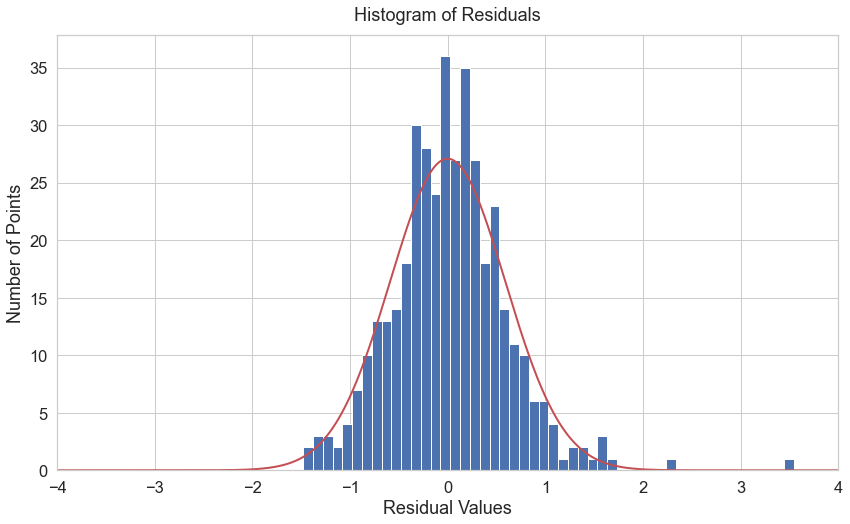

In [33]:
# plot residuals histogram
# to have consistent histograms for comparison with other results one needs to set appropriate bin size for the histogram
# the number of bins is then determined from the bin size and the spead of the values in question
bin_size = 0.1
n_bins = int((res.max() - res.min()) // bin_size) # make sure to define it as an integer

# set a min/max x-range for the plot
x_min = -4
x_max = 4

# create appropriate normal distribution to compare with
# define x-values for the theoretical normal distribution with appropriate mean and std
x_th = np.arange(x_min, x_max, 0.01)
# corresponding normal distribution - select 0 as the center of the distribution and the residuals std as scale
norm_dist = bin_size * len(res) * norm.pdf(x_th, loc = 0, scale = res.std())

plt.figure(figsize = (14, 8))
plt.hist(res, bins = n_bins, label = 'Residuals Distribution')
plt.plot(x_th, norm_dist, color = 'r', lw = 2, label = 'Normal distribution')
plt.xlim(x_min, x_max)
plt.xlabel('Residual Values')
plt.ylabel('Number of Points')
plt.title('Histogram of Residuals', pad = 15)

plt.show()

- Although not a perfect match to a normal distribution, the residuals distribution is quite close to normal. Coupled with the small normalized residual std this indicates a good model
- ***Note***: The deviation from normal distribution is due in part to the small number of test points --> in order to approach normal distribution for a good model thousands of test points are required

### Conclusion

- A linear regression model which uses only the feature with highest degree of correlation with the target provides rather inaccurate predictions
- A multi-linear regression model which uses all independent feature (but one) to predict the target values performs much better as evidenced by the better R2 score, the low RMSE and the closeness of the residuals distribution to a normal distribution
- Other suitable ML algorithms that can be used here are Logistic Regression and Random Forest